In [43]:
import numpy as np
%matplotlib inline
%config InlineBackend.figure_formats=['svg']
import matplotlib.pyplot as plt
import matplotlib
plt.style.use(['ggplot', 'dark_background'])
plt.rcParams['axes.grid'] = False

plt.style.use('default')

from importlib import reload
from latila_lib import plot as _plot
lplt = reload(_plot)

lplt.change_font('STKaiti')
import pymc3 as pm

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [35]:
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [11]:
import arviz as az
# ArviZ ships with style sheets!
az.style.use("arviz-darkgrid")
import xarray
xarray.set_options(display_style="html")

In [12]:
size = 100
dataset = az.convert_to_inference_data(np.random.randn(size))
dataset

Inference data with groups:
	> posterior

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7d9d2be390>],
      dtype=object)

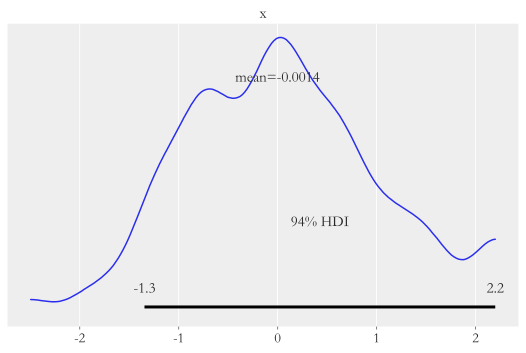

In [8]:
az.plot_posterior(np.random.randn(100))

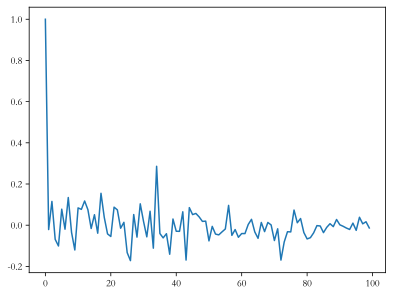

In [19]:
plt.plot(az.autocorr(np.random.randn(100)))

In [36]:
a = az.convert_to_inference_data(np.random.randn(100))
b = az.convert_to_inference_data(np.random.uniform(size=100))
az.plot_dist(np.random.randn(100), quantiles=[0.5], backend="bokeh")

Figure(id='1214', ...)

In [39]:
mu1 = np.random.uniform() * 3
mu2 = np.random.uniform() * 5

data1 = np.random.normal(loc=mu1, scale=1, size=1000)
data2 = np.random.normal(loc=mu2, scale=1, size=1000)

data = data1 + data2

In [45]:
with pm.Model() as model:
    mu1 = pm.Uniform("mu1", 0, 10)
    mu2 = pm.Uniform('mu2', 0, 10)
    std1 = pm.Uniform('std1', 0, 3)
    normal = pm.Normal('normal', mu=mu1+mu2, sigma=std1, observed=data)
    trace = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [std1, mu2, mu1]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 61 seconds.
The acceptance probability does not match the target. It is 0.907649530770802, but should be close to 0.8. Try to increase the number of tuning steps.
There were 29 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.


In [46]:
import arviz as az

In [47]:
with model:
    result = az.from_pymc3(trace)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7d8a57ffd0>,
      dtype=object)

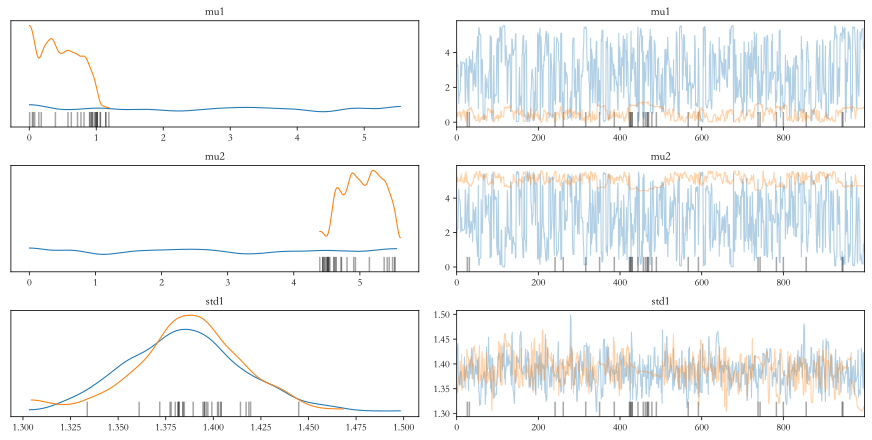

In [48]:
az.plot_trace(result)